# Convolutional Neural Network

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, Flatten, BatchNormalization, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

import itertools
import os
import shutil
import random
import glob

import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
'''

# Organize Data

os.chdir('L:\AI & ML\TensorFlow')

# Creating folders
os.chdir('./datum/dogsncats')

# os.makedirs('train/dogs')
# os.makedirs('train/cats')
# os.makedirs('valid/dogs')
# os.makedirs('valid/cats')
# os.makedirs('test/dogs')
# os.makedirs('test/cats')

for c in random.sample(glob.glob('cat*'), 500):
    shutil.move(c, 'train/cats')
for c in random.sample(glob.glob('dog*'), 500):
    shutil.move(c, 'train/dogs')
for c in random.sample(glob.glob('cat*'), 100):
    shutil.move(c, 'valid/cats')
for c in random.sample(glob.glob('dog*'), 100):
    shutil.move(c, 'valid/dogs')
for c in random.sample(glob.glob('cat*'), 50):
    shutil.move(c, 'test/cats')
for c in random.sample(glob.glob('dog*'), 50):
    shutil.move(c, 'test/dogs')


os.chdir('../../')

'''

In [3]:
# Paths

train_path = './datum/dogsncats/train'
test_path = './datum/dogsncats/test'
valid_path = './datum/dogsncats/valid'

In [12]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['cats', 'dogs'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['cats', 'dogs'], batch_size=10, shuffle=False)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cats', 'dogs'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [5]:
imgs, labels = next(train_batches)

In [6]:
def plotImages(images_arr): # https://www.tensorflow.org/tutorials/images/classification#visualize_the_data
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

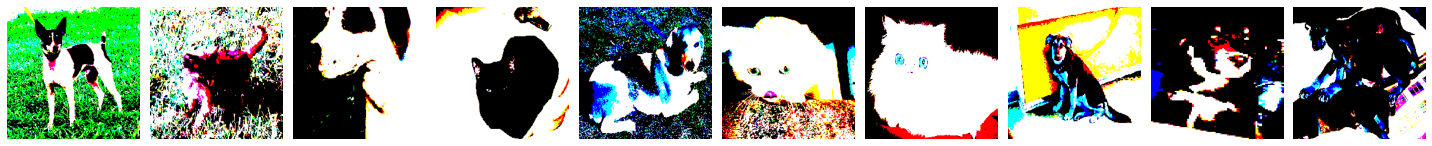

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [7]:
plotImages(imgs)
labels

In [8]:
np.argmax(labels, axis=-1)

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

### Build and train CNN 

In [9]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)), # Accepts image data, 3rd parama in input_shape specifies that there are 3 color channels
    MaxPool2D(pool_size=(2,2) , strides=2), # cuts down image dimensions into halves.
    Conv2D(filters=64, kernel_size=(3,3), activation='relu',  padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(), # Flatten everything to 1d tensor (1d uniform array)
    Dense(units=2, activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
100/100 - 29s - loss: 22.0689 - accuracy: 0.5710 - val_loss: 12.7415 - val_accuracy: 0.5450
Epoch 2/10
100/100 - 28s - loss: 5.7887 - accuracy: 0.6980 - val_loss: 4.8815 - val_accuracy: 0.5750
Epoch 3/10
100/100 - 30s - loss: 0.9096 - accuracy: 0.8780 - val_loss: 3.5262 - val_accuracy: 0.6150
Epoch 4/10
100/100 - 31s - loss: 0.3675 - accuracy: 0.9190 - val_loss: 3.4050 - val_accuracy: 0.6550
Epoch 5/10
100/100 - 34s - loss: 0.2260 - accuracy: 0.9490 - val_loss: 3.1816 - val_accuracy: 0.6300
Epoch 6/10
100/100 - 36s - loss: 0.1104 - accuracy: 0.9670 - val_loss: 4.9131 - val_accuracy: 0.5600
Epoch 7/10
100/100 - 86s - loss: 0.0632 - accuracy: 0.9820 - val_loss: 3.2470 - val_accuracy: 0.6850
Epoch 8/10
100/100 - 34s - loss: 0.0035 - accuracy: 0.9990 - val_loss: 3.1940 - val_accuracy: 0.6300
Epoch 9/10
100/100 - 33s - loss: 9.8089e-04 - accuracy: 1.0000 - val_loss: 3.0072 - val_accuracy: 0.6450
Epoch 10/10
100/100 - 41s - loss: 2.8138e-04 - accuracy: 1.0000 - val_loss: 3.0033 - 

### Prediction

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

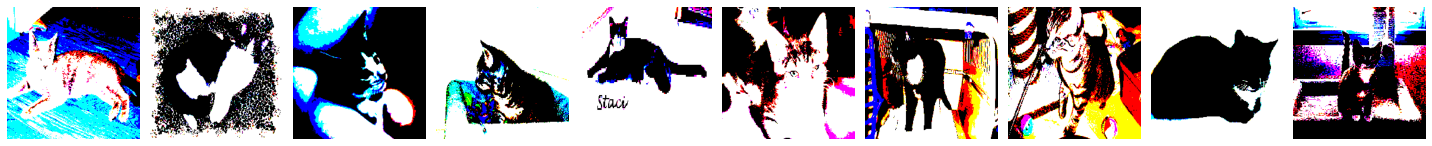

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [13]:
test_images, test_labels = next(test_batches)
plotImages(test_images)
print(test_labels)

In [11]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
predictions = model.predict(x=test_batches)
np.round(predictions)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [21]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
test_batches.class_indices

{'cats': 0, 'dogs': 1}

Confusion matrix, without normalization
[[34 16]
 [17 33]]


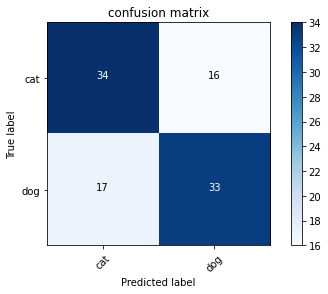

In [24]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion matrix')

In [25]:
model.save('./models/dogsncats.h5')